In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("mobile_sales_data.csv")
df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


In [2]:
df.isnull().sum()

Product                        0
Brand                          0
Product Code                   0
Product Specification          0
Price                          0
Inward Date                    0
Dispatch Date                  0
Quantity Sold                  0
Customer Name                  0
Customer Location              0
Region                         0
Core Specification         24983
Processor Specification        0
RAM                            0
ROM                            0
SSD                        24983
dtype: int64

In [3]:
df.groupby(["Product"])["Core Specification"].value_counts()

Product  Core Specification
Laptop   i5                    3215
         Ryzen 3               3176
         i9                    3146
         i3                    3143
         Ryzen 7               3135
         i7                    3105
         Ryzen 5               3050
         Ryzen 9               3047
Name: count, dtype: int64

In [4]:
df.Product.unique()

array(['Mobile Phone', 'Laptop'], dtype=object)

In [5]:
df.Product.value_counts()

Product
Laptop          25017
Mobile Phone    24983
Name: count, dtype: int64

In [6]:
df["Brand"].value_counts()

Brand
Google       2598
Nokia        2571
Apple        2564
Samsung      2558
Toshiba      2555
Sony         2547
OnePlus      2541
Acer         2533
Redmi        2529
Huawei       2497
Vivo         2489
Motorola     2483
Lenovo       2471
iQOO         2467
Oppo         2460
Microsoft    2457
HP           2446
Dell         2435
Asus         2413
Realme       2386
Name: count, dtype: int64

In [7]:
df.corr(numeric_only=True)

,Price,Quantity Sold
Price,1.00000,-0.00222
Quantity Sold,-0.00222,1.00000


In [8]:
df.nunique()

Product                        2
Brand                         20
Product Code               50000
Product Specification      50000
Price                      44112
Inward Date                  731
Dispatch Date                788
Quantity Sold                 10
Customer Name              40013
Customer Location          25147
Region                         5
Core Specification             8
Processor Specification       15
RAM                            6
ROM                            5
SSD                            4
dtype: int64

In [9]:
df["Inward Date"] = pd.to_datetime(df["Inward Date"])
df["Dispatch Date"]= pd.to_datetime(df["Dispatch Date"])

What are the top-selling brands overall?

How many products were sold in total?

What is the average price of products?

Which region has the highest number of sales?

Which product type (Mobile Phone vs Laptop) is sold more frequently?

What is the distribution of RAM and ROM among the sold products?

Which month had the highest number of product dispatches?

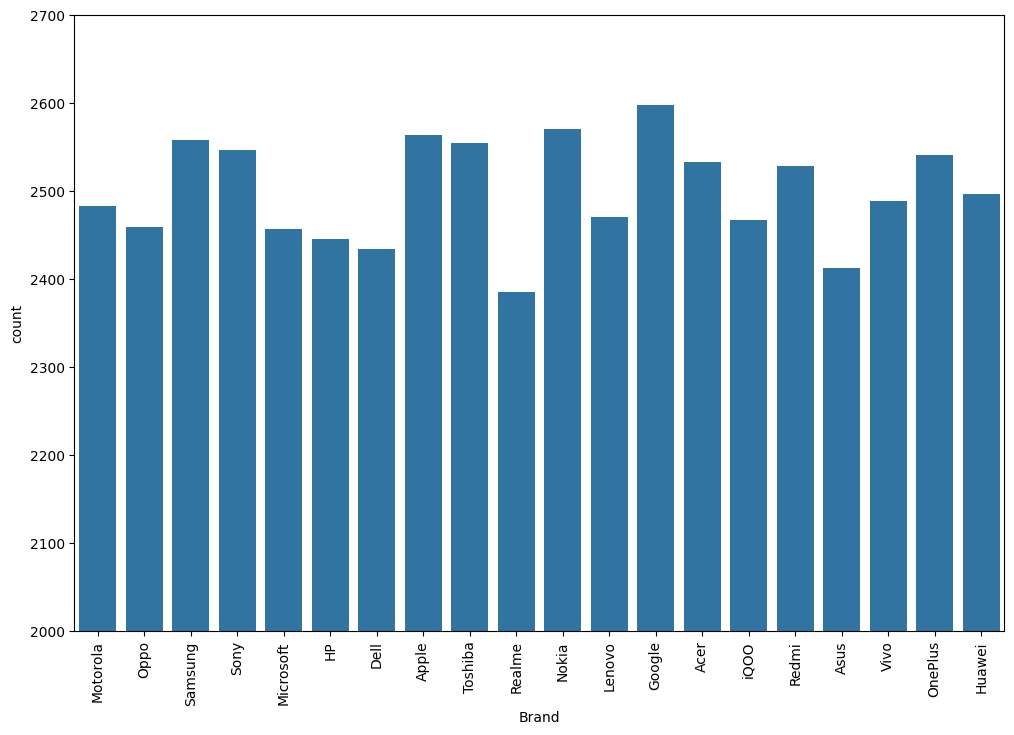

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x=df.Brand)
plt.ylim(2000,2700)
plt.xticks(rotation=90)
plt.show()

As per Above Graph Google is the top selling Brand overall

In [11]:
temp=df.groupby(["Product"])["Quantity Sold"].sum()

Product
Laptop          138019
Mobile Phone    137670
Name: Quantity Sold, dtype: int64


(135000.0, 140000.0)

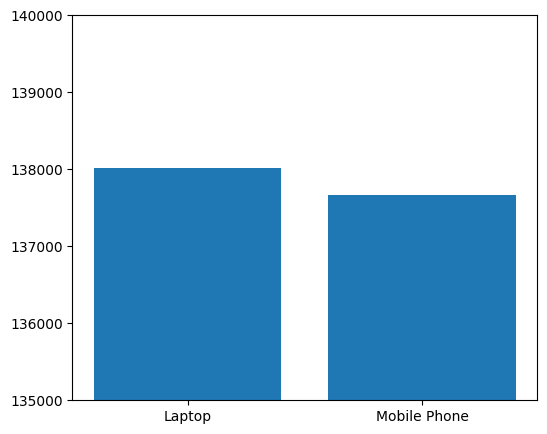

In [12]:
print(temp)
plt.figure(figsize=(6,5))
plt.bar(temp.index,temp.values)
plt.ylim(135000,140000)


As per above Graph Laptop has more sales than Mobile Phone

In [13]:
What is the average price of products?

Object `products` not found.


In [14]:
mobile=df[df.Product=="Mobile Phone"]["Price"].mean()
laptop=df[df.Product=="Laptop"]["Price"].mean()
print(mobile)
print(laptop)

102498.00636432774
102784.6129032258


In [15]:
Which region has the highest number of sales?

Object `sales` not found.


In [16]:
temp=df.groupby(["Region"])["Price"].sum()

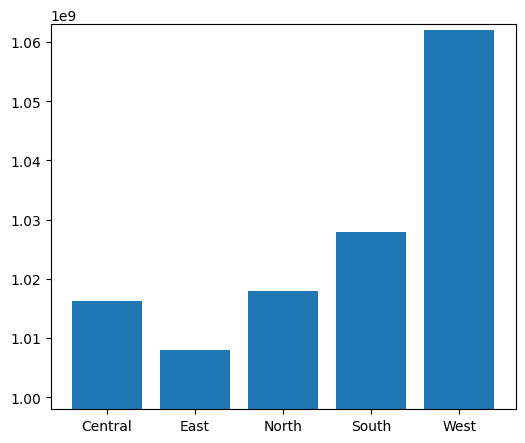

In [17]:
plt.figure(figsize=(6,5))
plt.bar(temp.index,temp.values)
plt.ylim(1007968721-10000000,1062003381+1000000)
# plt.yticks(temp.values)
plt.show()

West Region as the most sales overall

In [18]:
Which product type (Mobile Phone vs Laptop) is sold more frequently?

Object `frequently` not found.


In [19]:
mobile =df[df["Product"]=="Mobile Phone"]["Quantity Sold"].sum()
laptop =df[df["Product"]=="Laptop"]["Quantity Sold"].sum()

<BarContainer object of 2 artists>

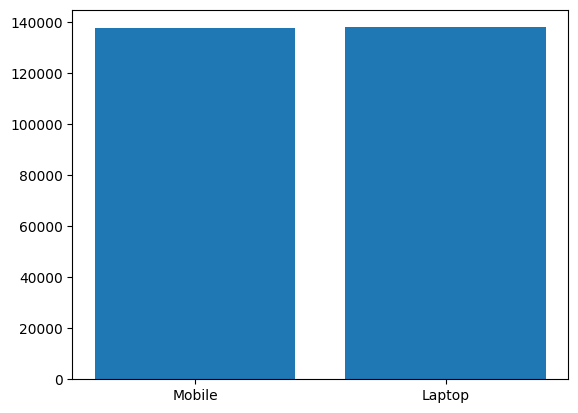

In [20]:
plt.bar(["Mobile","Laptop"],[mobile,laptop])

Both have almost same sales in terms of Quantity("Mobile"->137670,"Laptop"->138019)

In [21]:
What is the distribution of RAM and ROM among the sold products?

Object `products` not found.


In [22]:
df.groupby(["RAM","Product"])["Product"].count()

RAM   Product     
12GB  Laptop          4135
      Mobile Phone    4160
16GB  Laptop          4150
      Mobile Phone    4159
32GB  Laptop          4236
      Mobile Phone    4152
4GB   Laptop          4170
      Mobile Phone    4247
6GB   Laptop          4210
      Mobile Phone    4094
8GB   Laptop          4116
      Mobile Phone    4171
Name: Product, dtype: int64

In [23]:
df.groupby(["RAM","Product"])["Product"].count()

RAM   Product     
12GB  Laptop          4135
      Mobile Phone    4160
16GB  Laptop          4150
      Mobile Phone    4159
32GB  Laptop          4236
      Mobile Phone    4152
4GB   Laptop          4170
      Mobile Phone    4247
6GB   Laptop          4210
      Mobile Phone    4094
8GB   Laptop          4116
      Mobile Phone    4171
Name: Product, dtype: int64

In [24]:
df.groupby(["ROM","Product"])["Product"].count()

ROM    Product     
128GB  Laptop          5046
       Mobile Phone    4891
1TB    Laptop          5004
       Mobile Phone    4989
256GB  Laptop          5034
       Mobile Phone    5093
512GB  Laptop          5036
       Mobile Phone    4967
64GB   Laptop          4897
       Mobile Phone    5043
Name: Product, dtype: int64

In [25]:
Which month had the highest number of product dispatches?

Object `dispatches` not found.


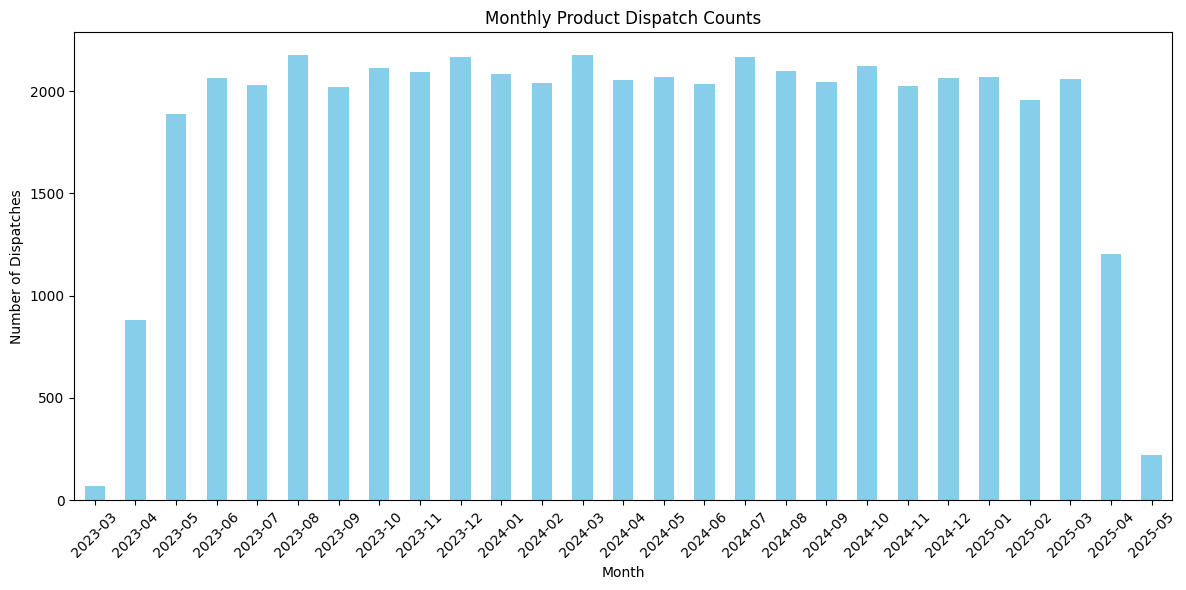

In [26]:
df["Dispatch Month"] = df["Dispatch Date"].dt.to_period("M")
monthly_dispatch_counts = df["Dispatch Month"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_dispatch_counts.plot(kind='bar', color='skyblue')
plt.title("Monthly Product Dispatch Counts")
plt.xlabel("Month")
plt.ylabel("Number of Dispatches")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What are the top 5 products by total quantity sold?

What’s the total revenue per region?

How does the sales volume vary across different brands and regions?

What are the most common processor types sold?

What’s the average quantity sold per transaction per brand?

How many products have SSD info missing (possibly mobiles)?

Is there a price difference between products with different RAM/ROM combinations?

In [27]:
temp = df.groupby(["Region"])["Price"].sum()
temp

Region
Central    1016267596
East       1007968721
North      1017874003
South      1027956653
West       1062003381
Name: Price, dtype: int64

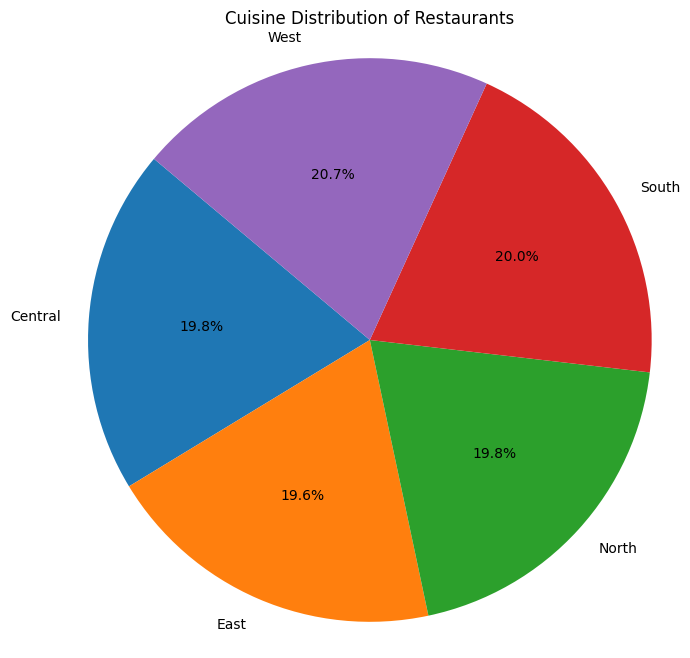

Text(0.5, 0, 'Region')

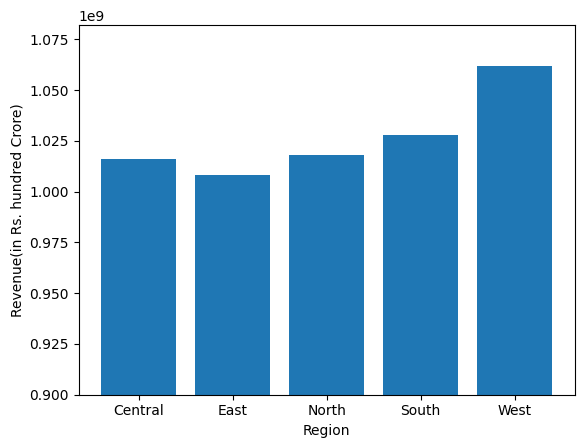

In [36]:
plt.figure(figsize=(8, 8))
plt.pie(temp.values, labels=temp.index, autopct='%1.1f%%', startangle=140)
plt.title('Cuisine Distribution of Restaurants')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
plt.bar(temp.index,temp.values)
plt.ylim(min(temp.values)-107968721,max(temp.values)+20000000)
plt.ylabel("Revenue(in Rs. hundred Crore)")
plt.xlabel("Region")


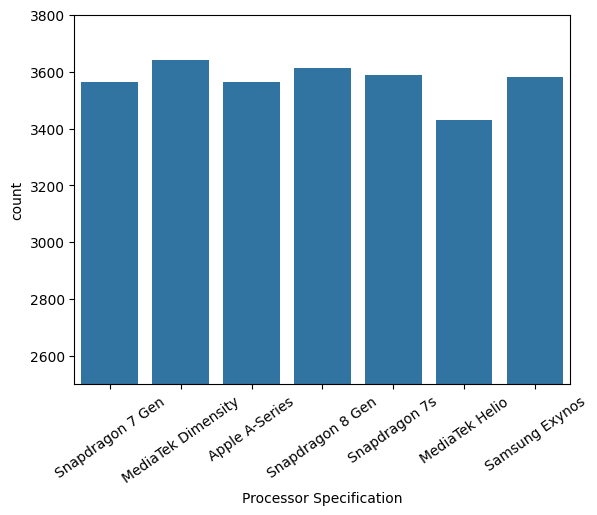

In [48]:
sns.countplot(x=df[df["Product"]=="Mobile Phone"]["Processor Specification"])
plt.xticks(rotation=35)
plt.ylim(2500,3800)
plt.show()

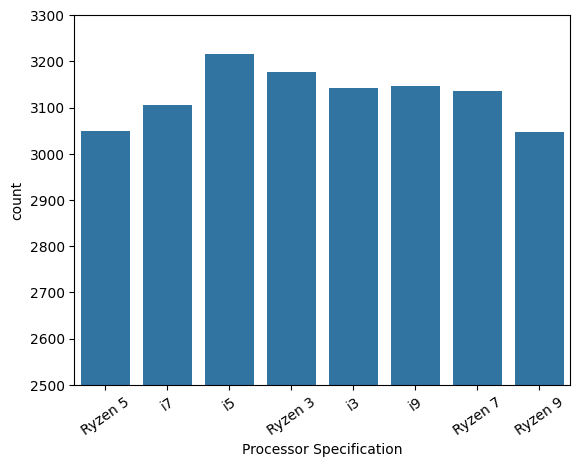

In [52]:
sns.countplot(x=df[df["Product"]=="Laptop"]["Processor Specification"])
plt.xticks(rotation=35)
plt.ylim(2500,3300)
plt.show()

In [53]:
# How does the sales volume vary across different brands and regions?
df.groupby(["Region","Brand"])["Price"].sum()

Region   Brand  
Central  Acer       52128320
         Apple      49363679
         Asus       47640264
         Dell       52479397
         Google     50370544
                      ...   
West     Samsung    54955059
         Sony       52046069
         Toshiba    52744790
         Vivo       51133410
         iQOO       54940490
Name: Price, Length: 100, dtype: int64

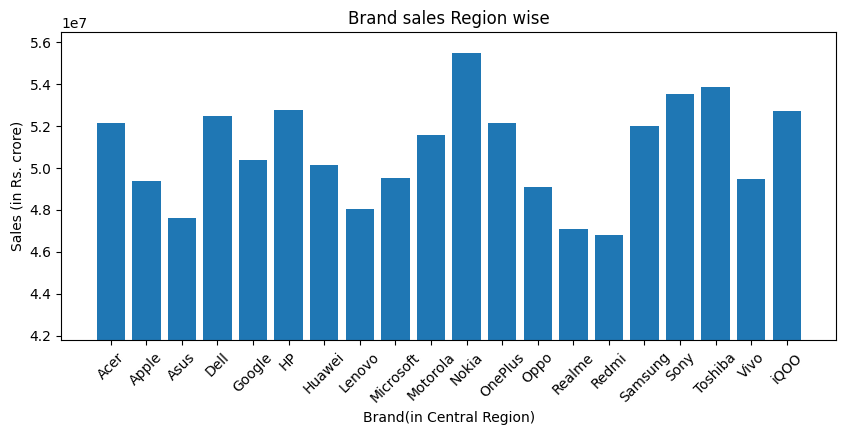

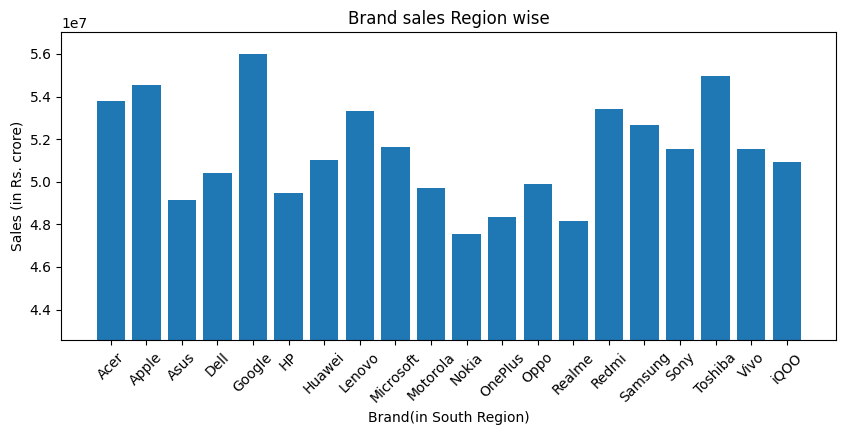

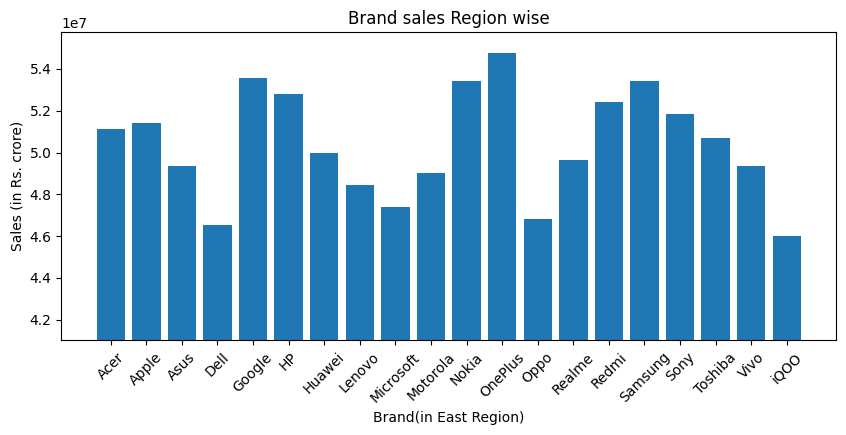

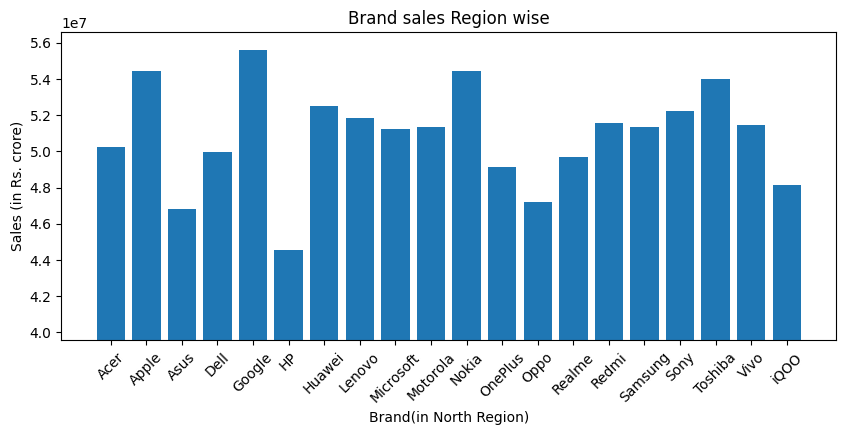

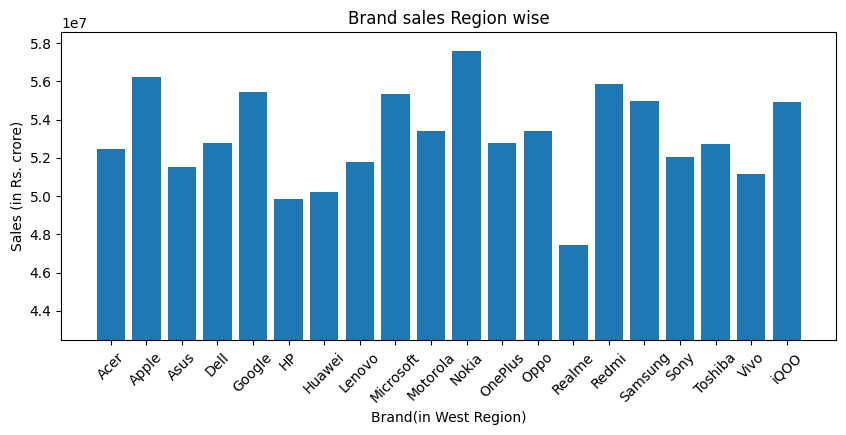

In [74]:
for i in df.Region.unique():
    temp=df[df.Region==i].groupby(["Brand"])["Price"].sum()
    
    plt.figure(figsize=(10,4))
    plt.title("Brand sales Region wise")
    plt.bar(temp.index,temp.values)
    plt.ylim(min(temp.values)-5000000,max(temp.values)+1000000)
    plt.xticks(rotation=45)
    plt.xlabel(f"Brand(in {i} Region)")
    plt.ylabel("Sales (in Rs. crore)")
    plt.show()

In [ ]:
What’s the average quantity sold per transaction per brand?

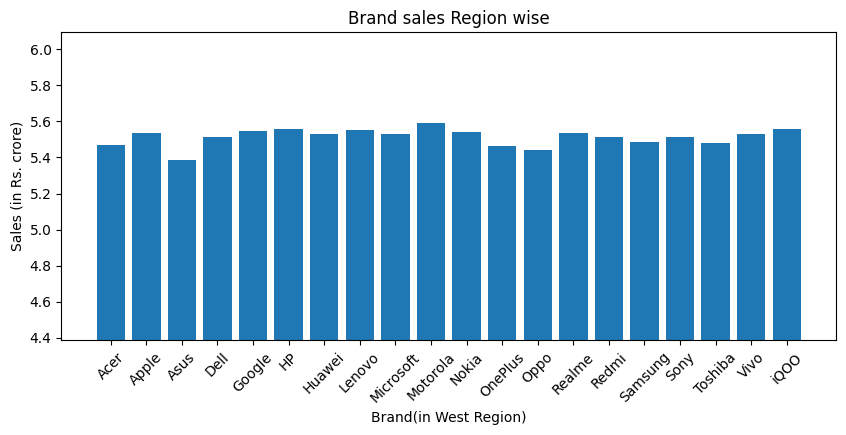

In [81]:
temp=df.groupby(["Brand"])["Quantity Sold"].mean()
plt.figure(figsize=(10,4))
plt.title("Brand sales Region wise")
plt.bar(temp.index,temp.values)
plt.ylim(min(temp.values)-1,max(temp.values)+0.5)
plt.xticks(rotation=45)
plt.xlabel(f"Brand(in {i} Region)")
plt.ylabel("Sales (in Rs. crore)")
plt.show()

In [82]:
Is there a price difference between products with different RAM/ROM combinations?

Brand
Acer         13854
Apple        14197
Asus         12999
Dell         13419
Google       14412
HP           13600
Huawei       13805
Lenovo       13723
Microsoft    13586
Motorola     13888
Nokia        14239
OnePlus      13880
Oppo         13389
Realme       13212
Redmi        13948
Samsung      14033
Sony         14043
Toshiba      13996
Vivo         13761
iQOO         13705
Name: Quantity Sold, dtype: int64

In [92]:
df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD,Dispatch Month
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN,2023-08
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB,2023-10
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN,2025-03
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB,2024-03
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB,2023-09


In [93]:
df["RAM/ROM"]=df["RAM"]+df["ROM"]

In [94]:
df["RAM/ROM"]

0        12GB128GB
1         8GB512GB
2         8GB256GB
3         12GB64GB
4         8GB128GB
           ...    
49995    16GB512GB
49996       8GB1TB
49997      4GB64GB
49998      12GB1TB
49999    12GB128GB
Name: RAM/ROM, Length: 50000, dtype: object

In [100]:
df["Unit Price"]=round(df["Price"]/df["Quantity Sold"])


In [116]:
Mob_df=df[df.Product=="Mobile Phone"]

array(['Mobile Phone'], dtype=object)

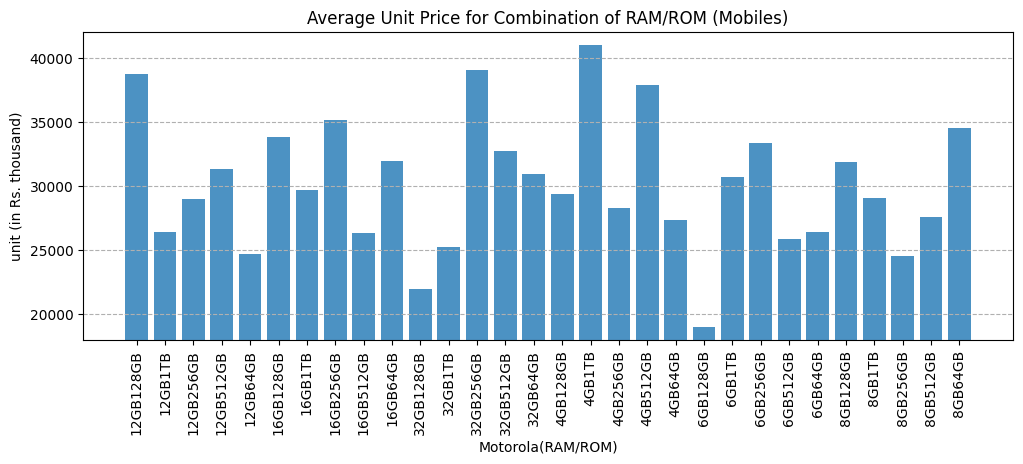

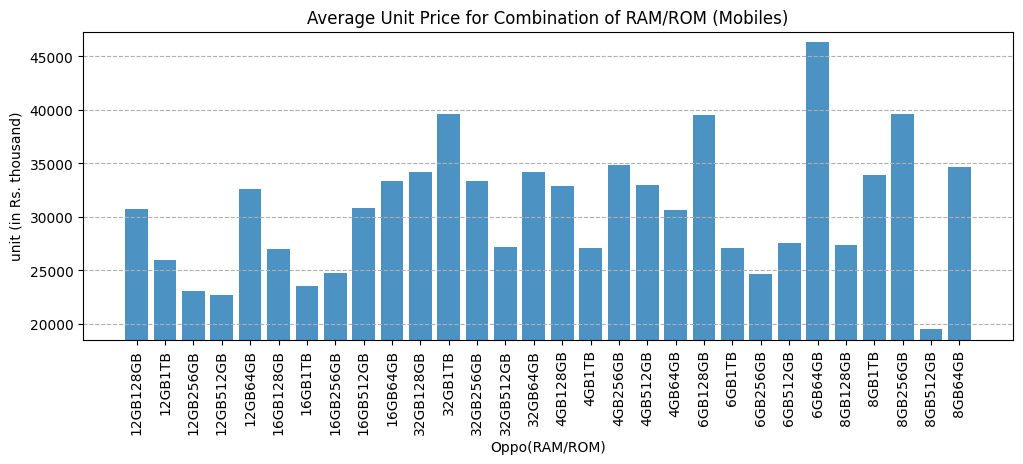

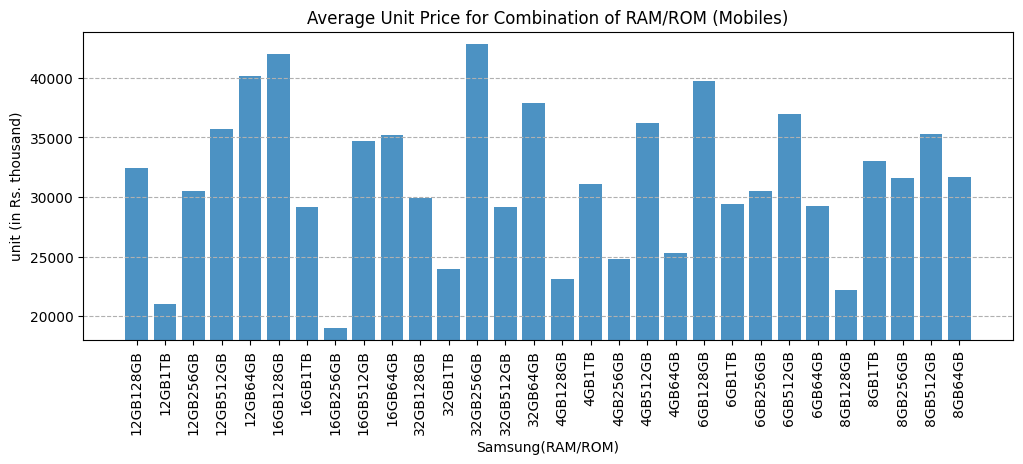

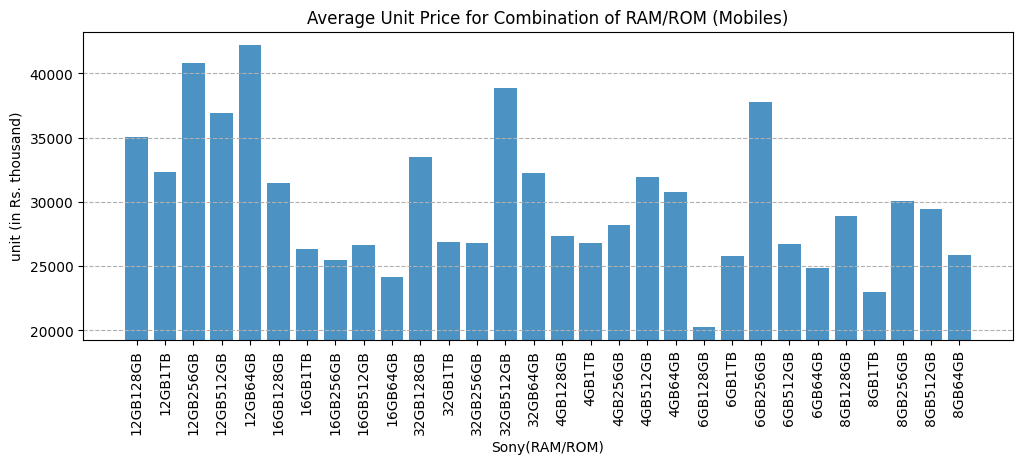

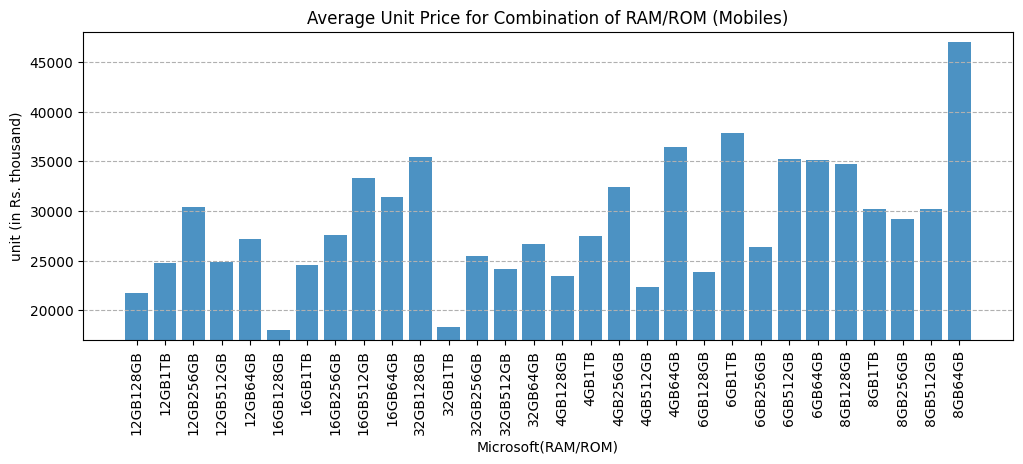

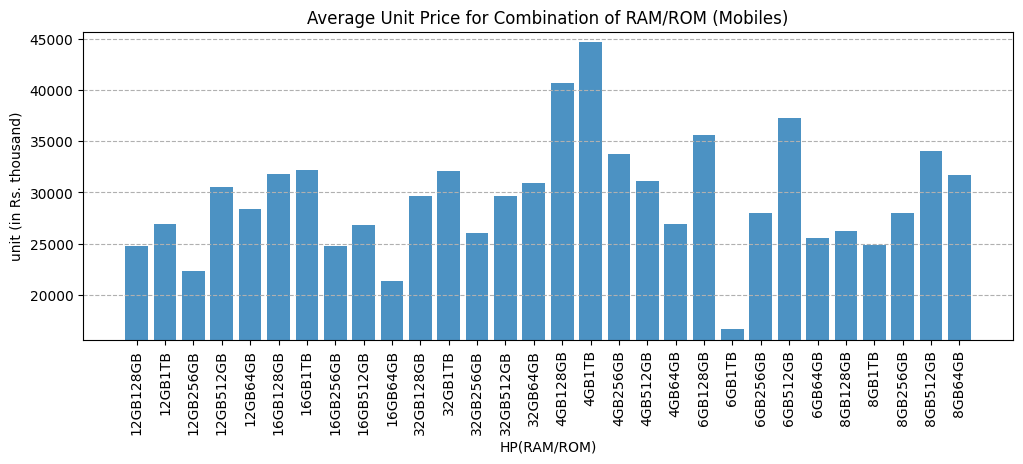

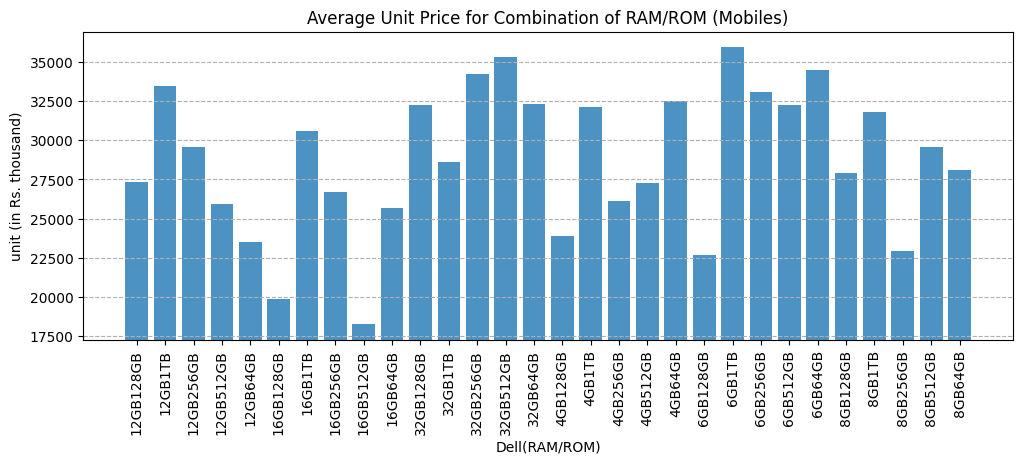

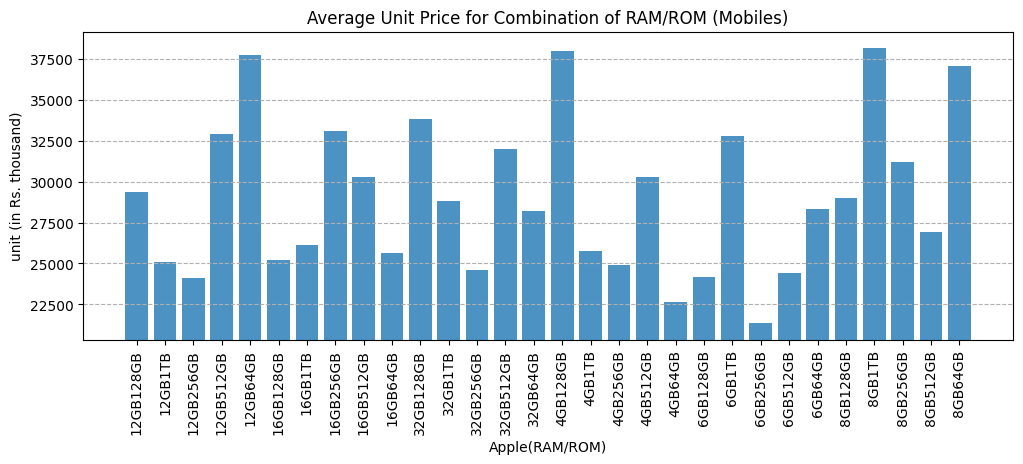

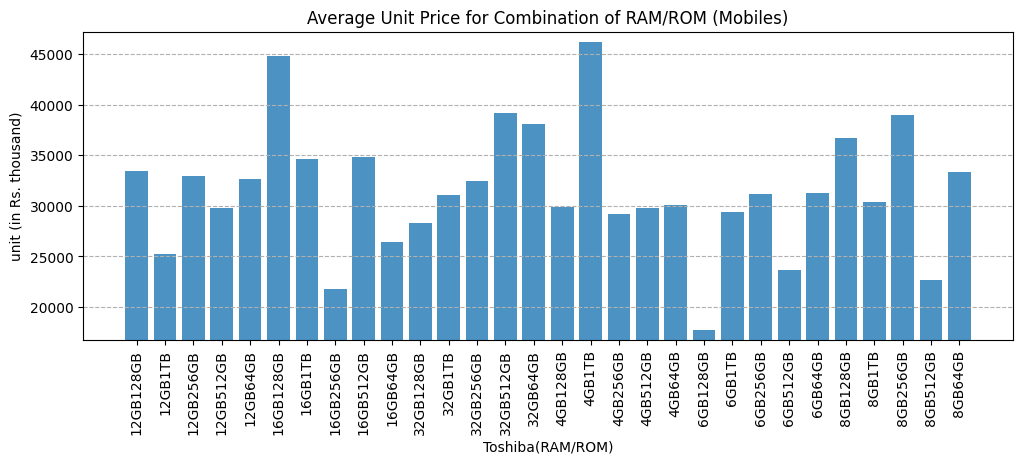

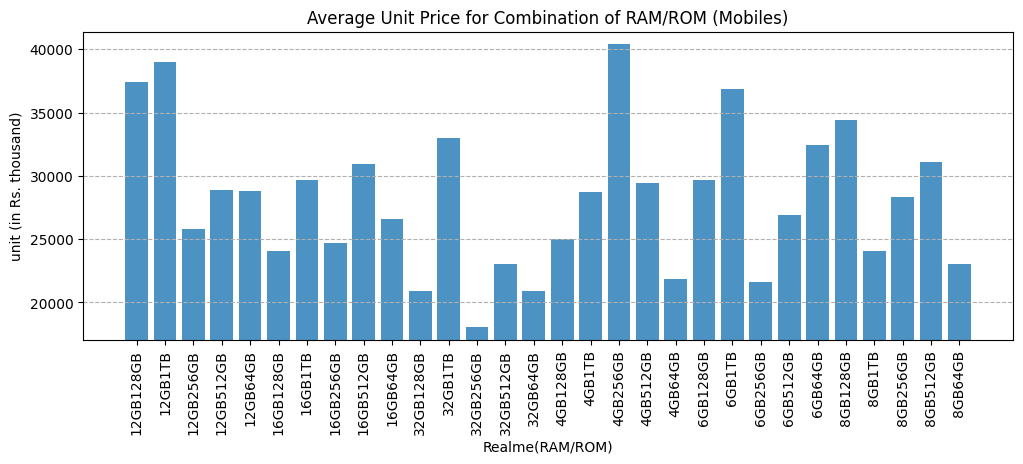

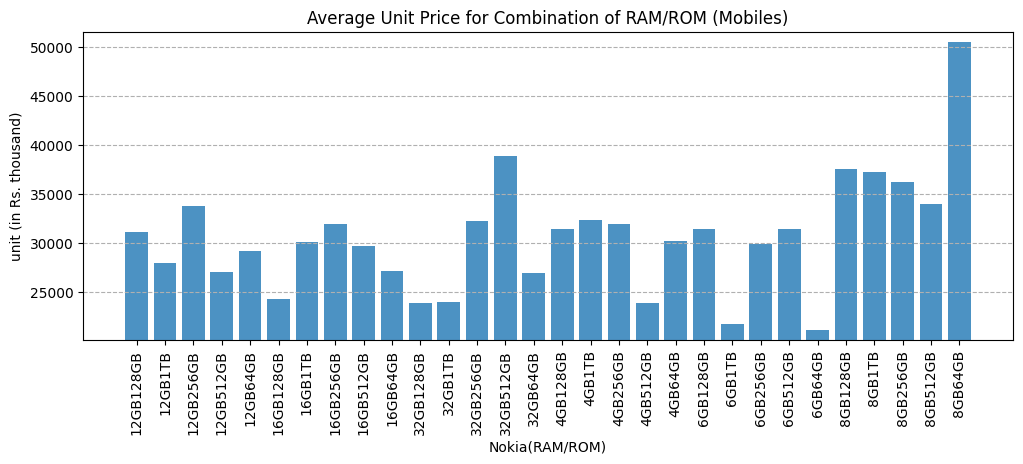

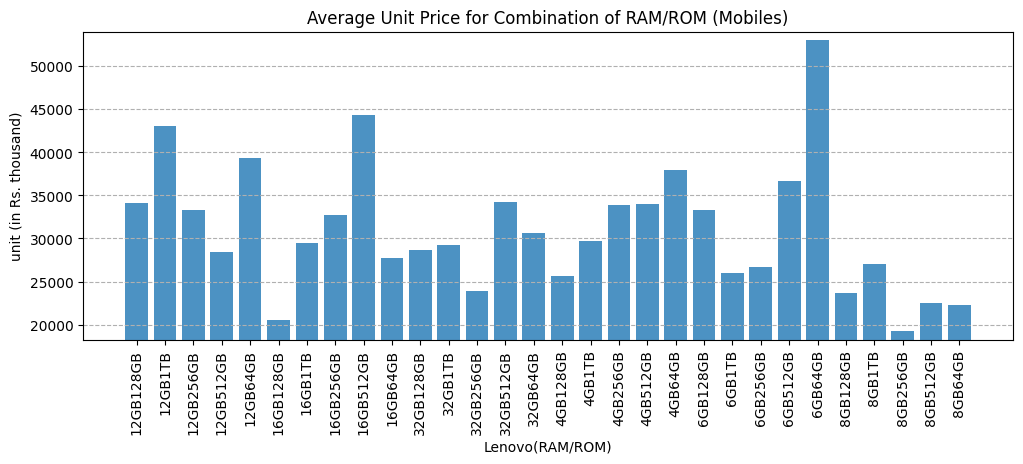

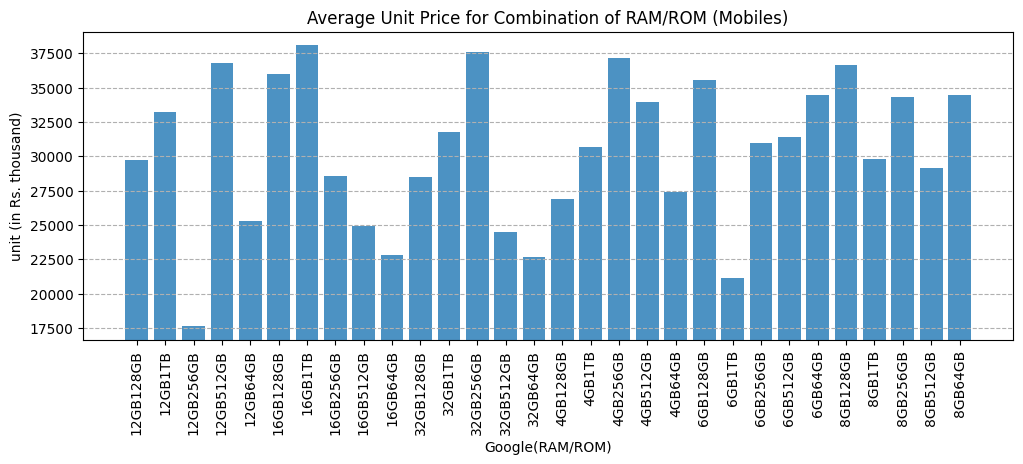

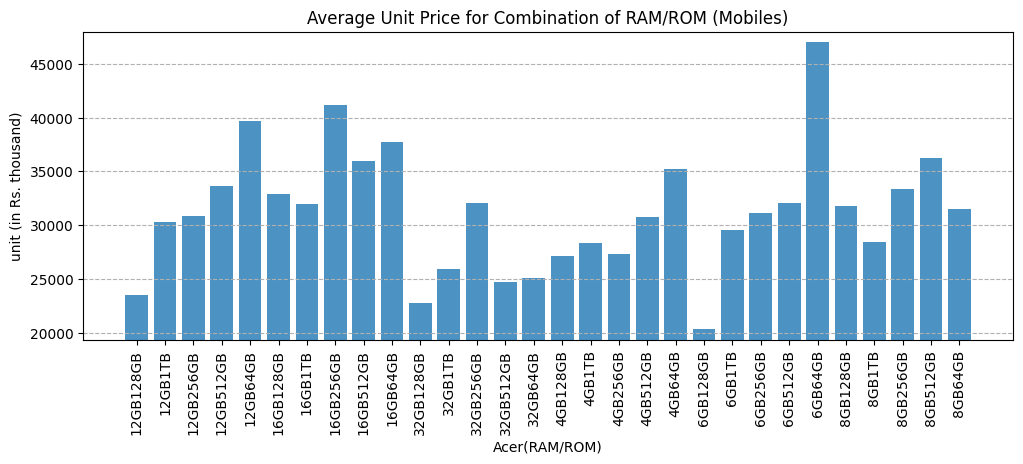

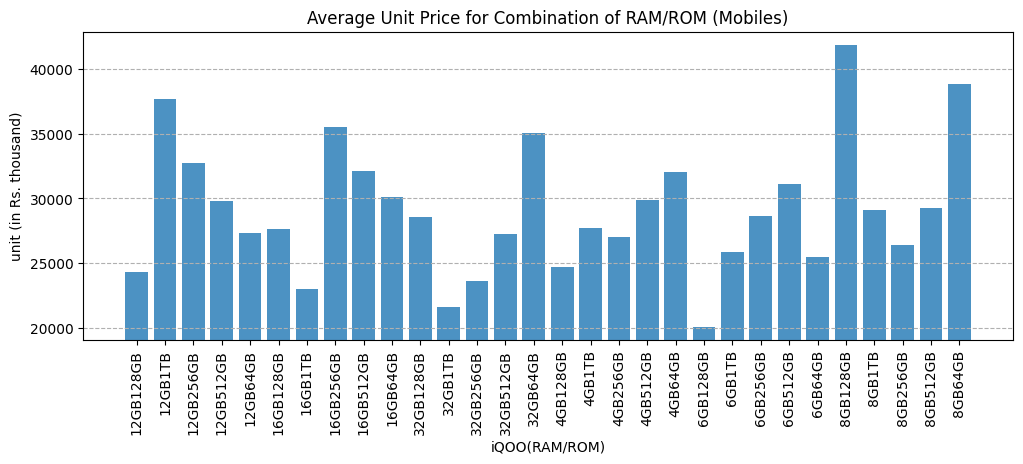

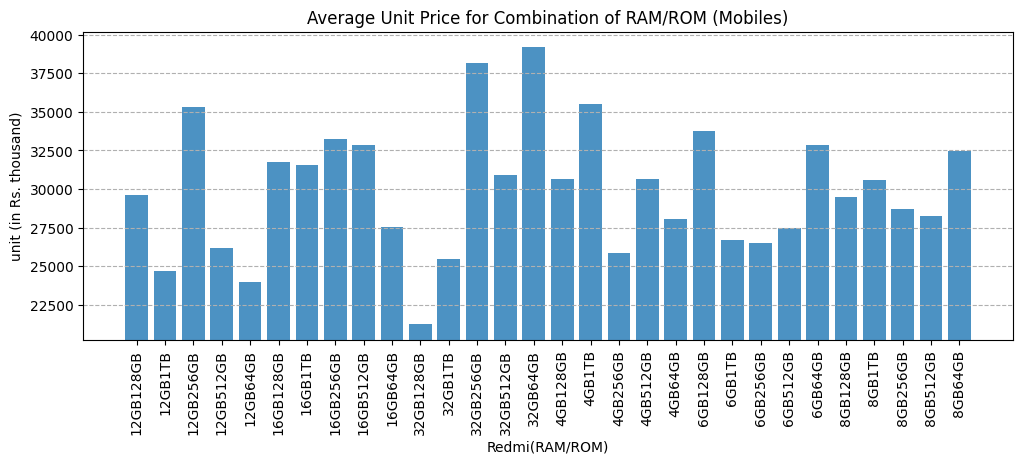

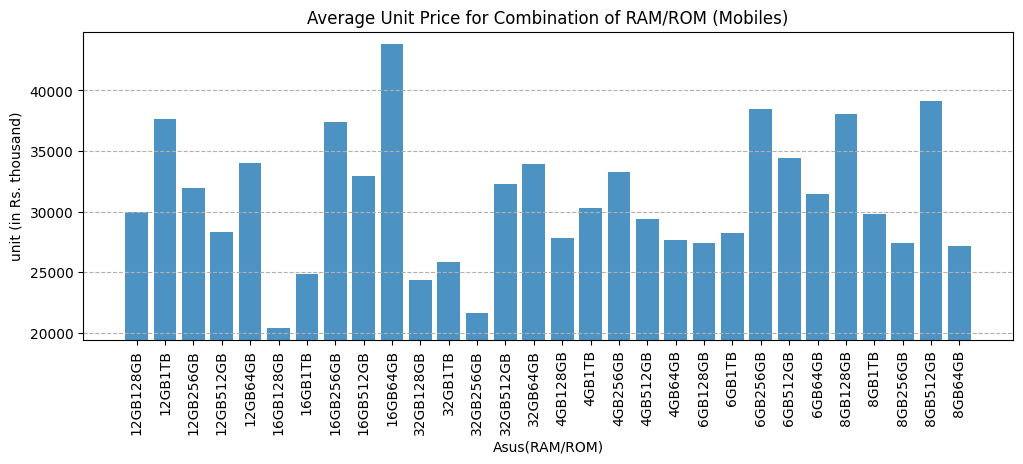

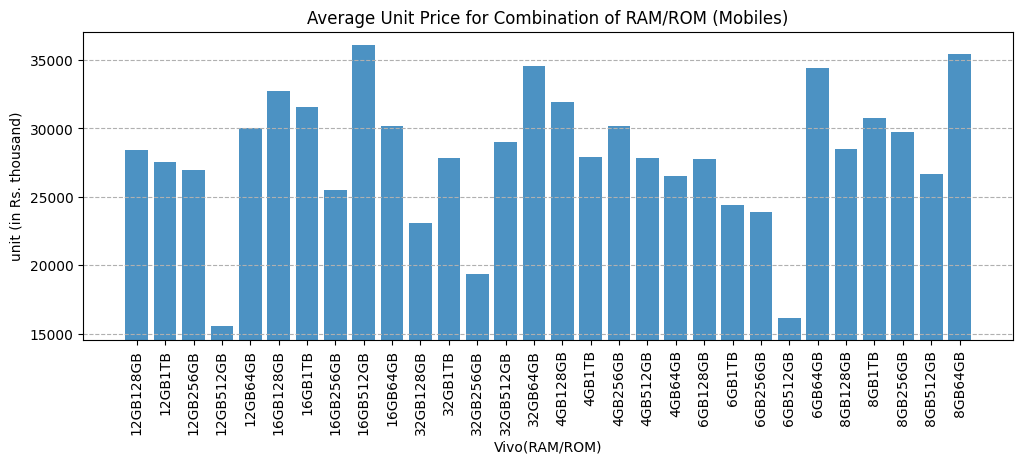

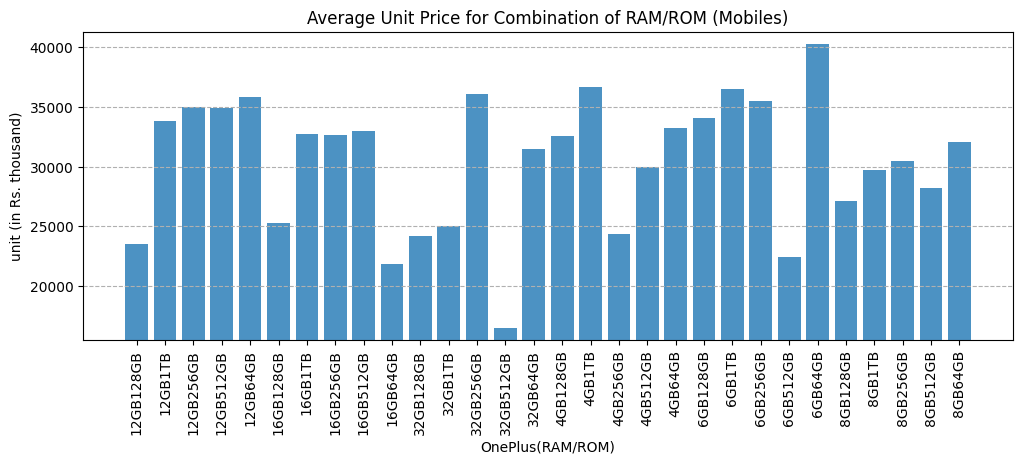

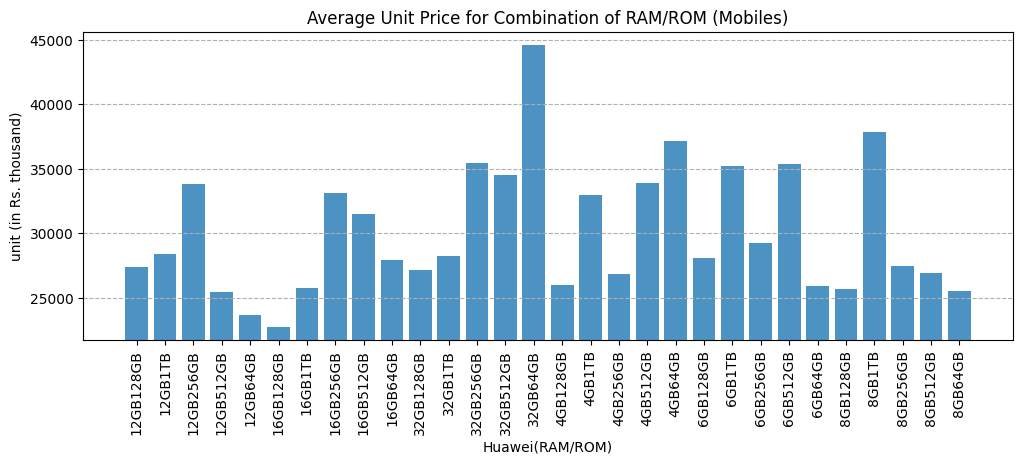

In [118]:
for i in df.Brand.unique():
    temp=Mob_df[Mob_df.Brand==i].groupby(["RAM/ROM"])["Unit Price"].mean()
    
    plt.figure(figsize=(12,4))
    plt.title("Average Unit Price for Combination of RAM/ROM (Mobiles)")
    plt.bar(temp.index,temp.values,alpha=0.8)
    plt.ylim(min(temp.values)-1000,max(temp.values)+1000)
    plt.xticks(rotation=90)
    plt.xlabel(f"{i}(RAM/ROM)")
    plt.grid(axis="y",linestyle="--")
    plt.ylabel("unit (in Rs. thousand)")
    plt.show()

In [119]:
Lap_df=df[df.Product!="Mobile Phone"]

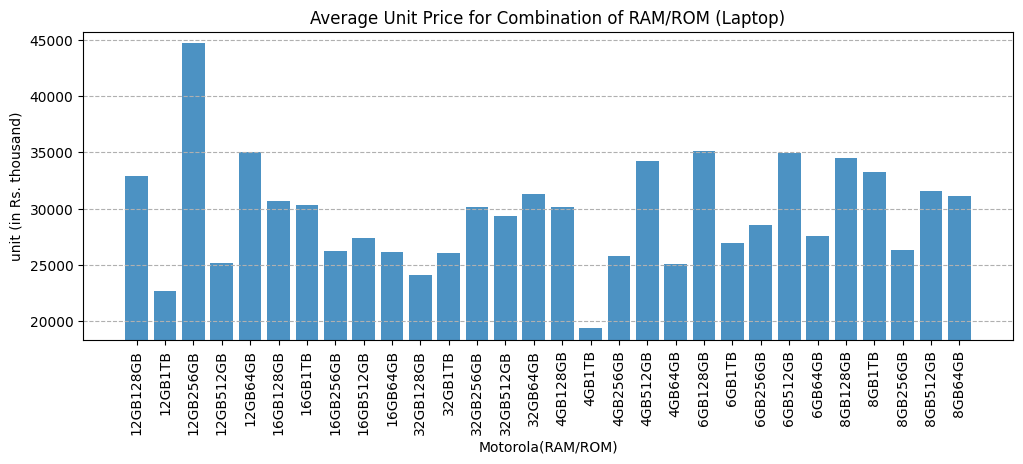

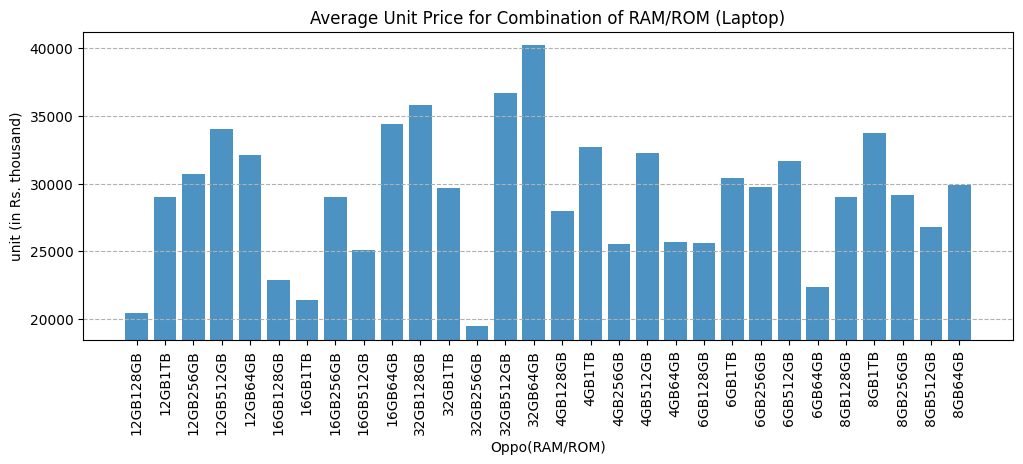

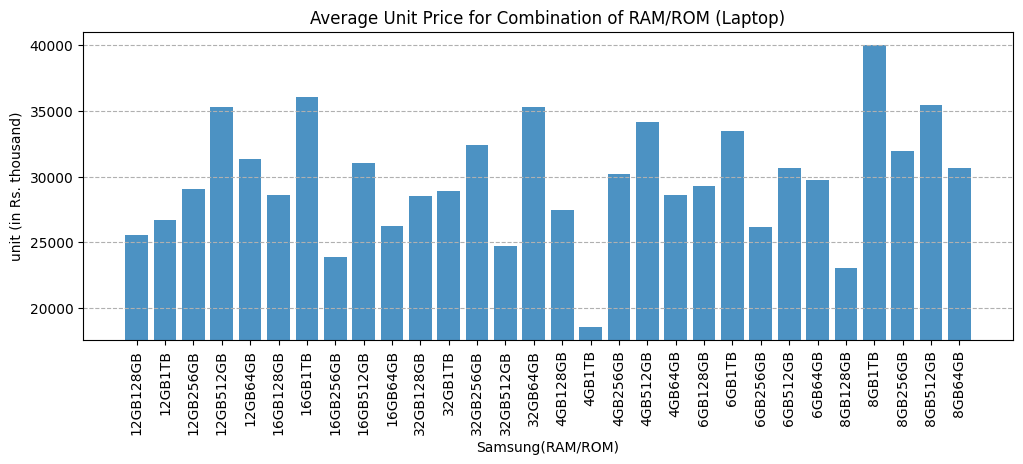

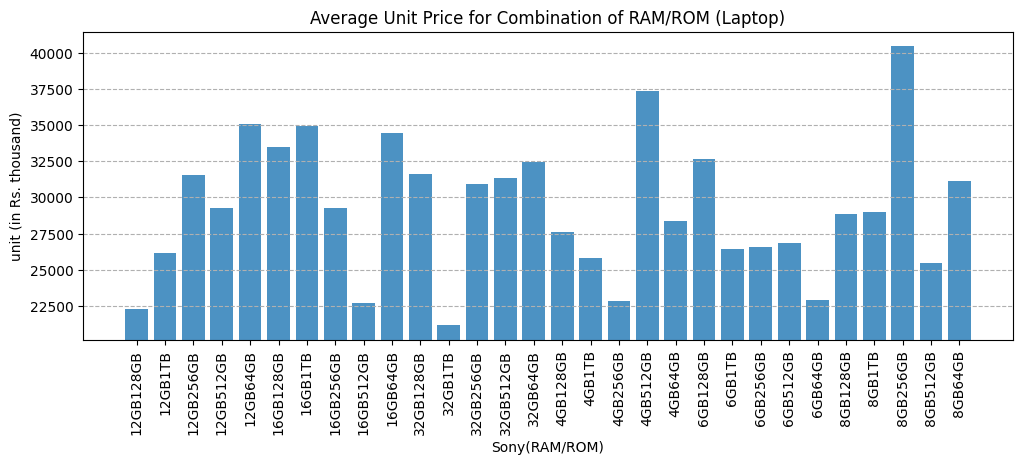

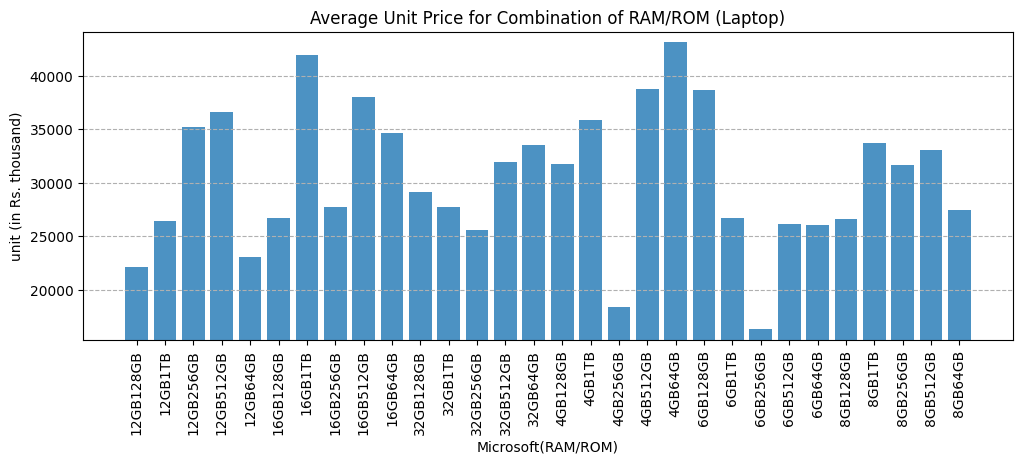

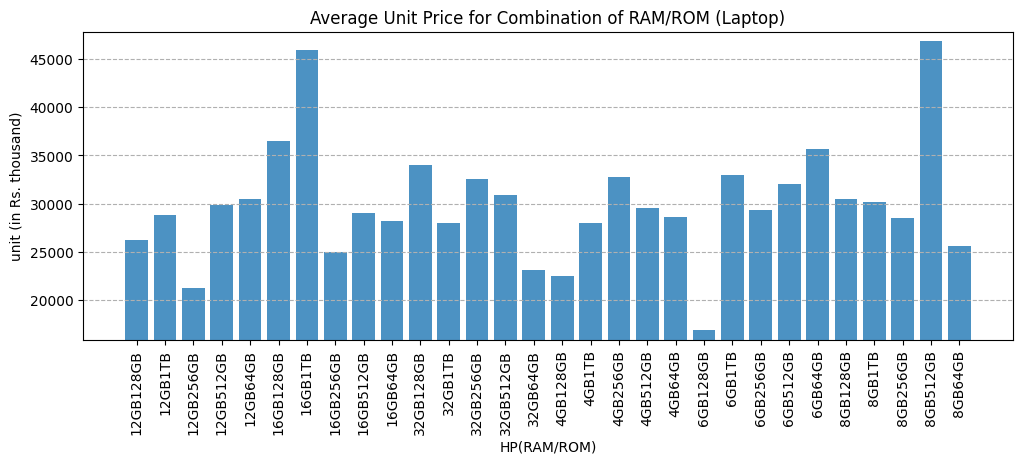

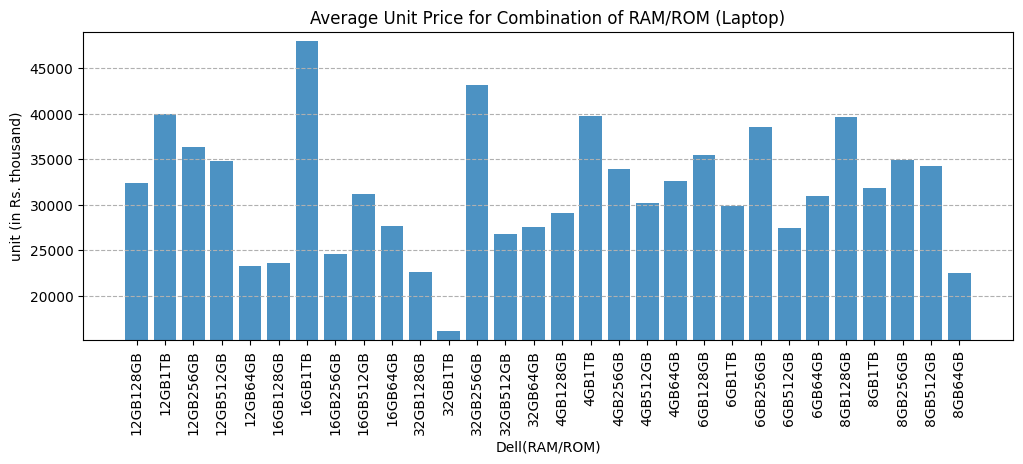

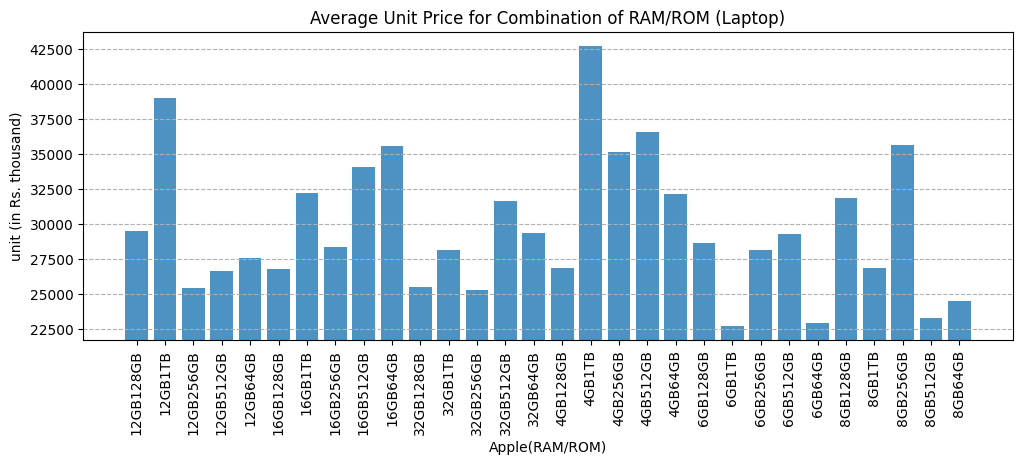

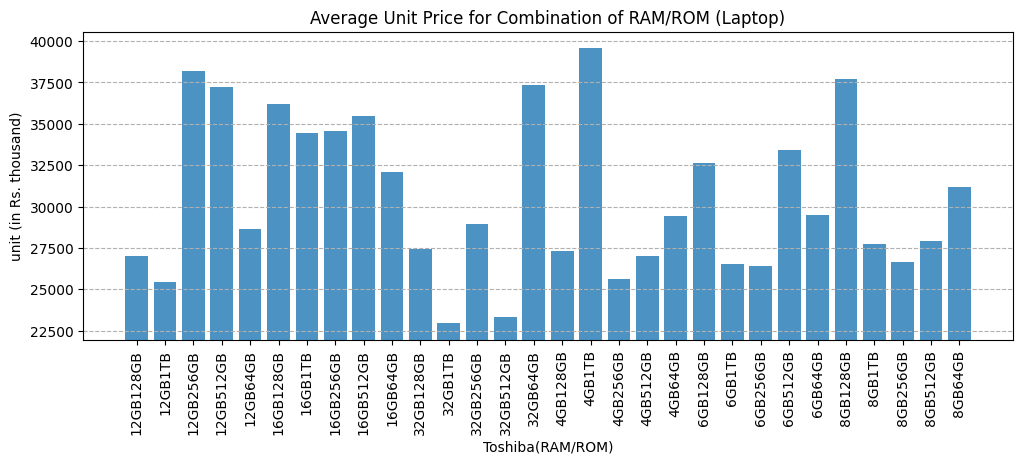

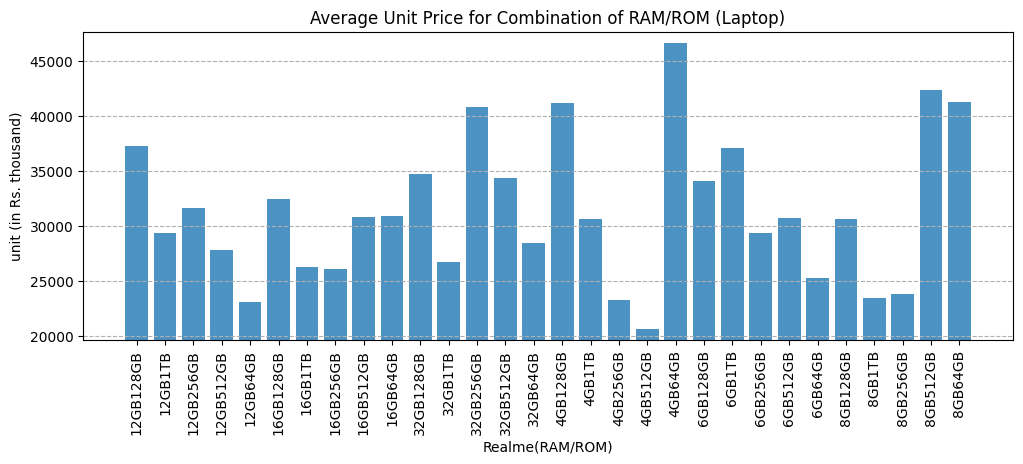

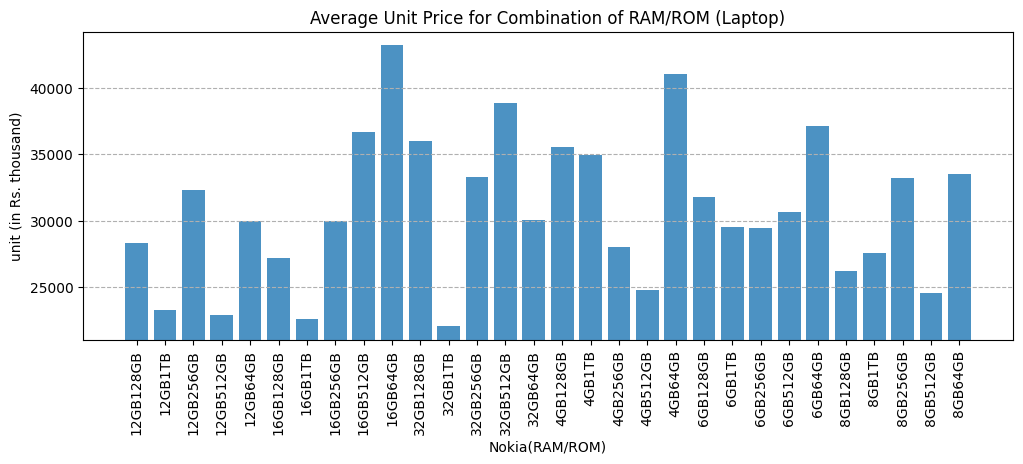

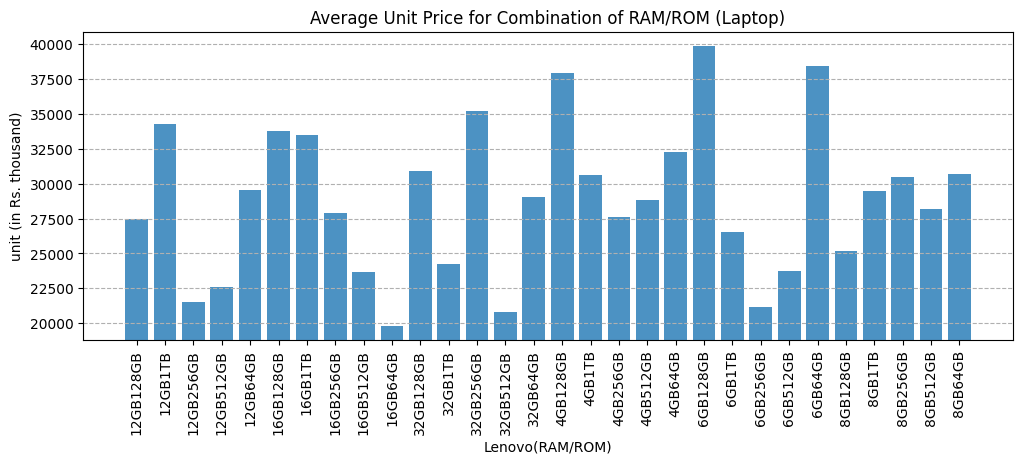

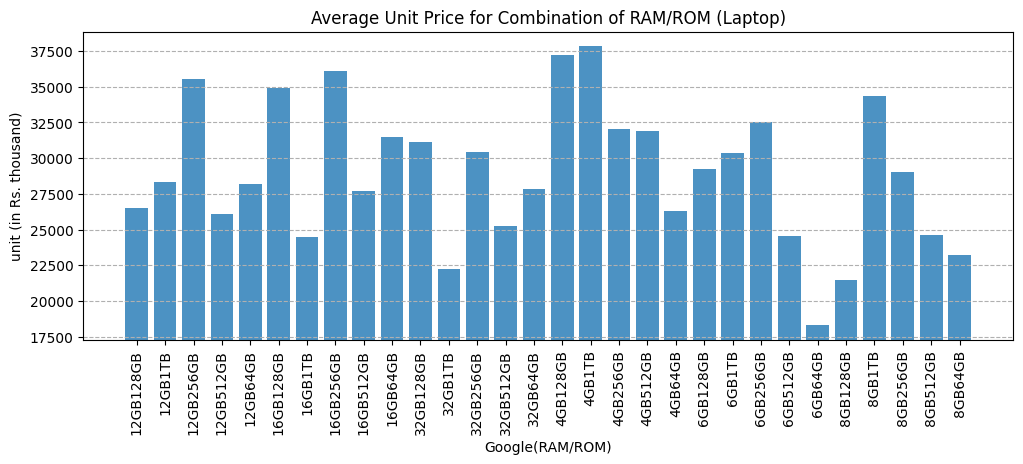

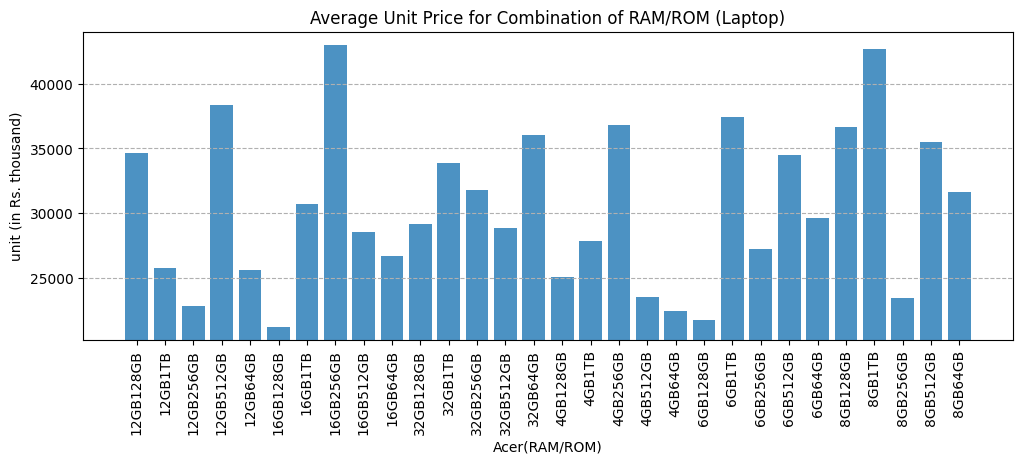

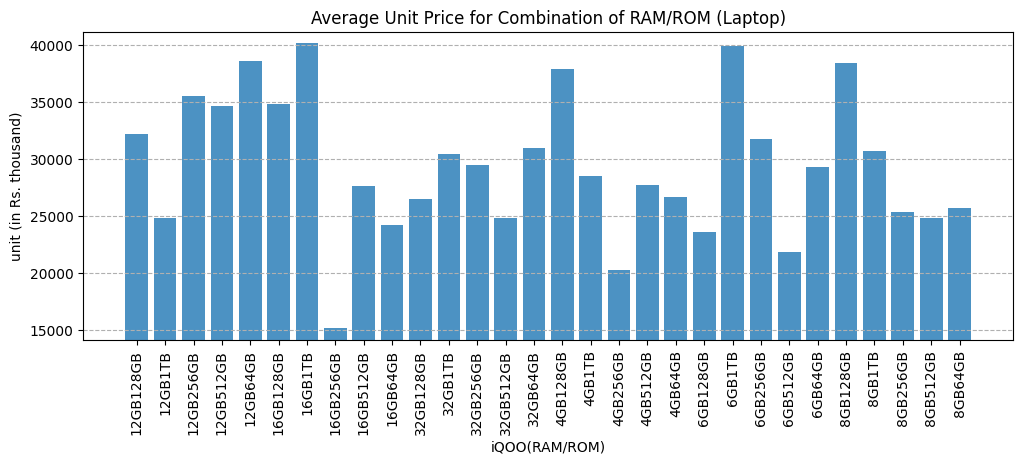

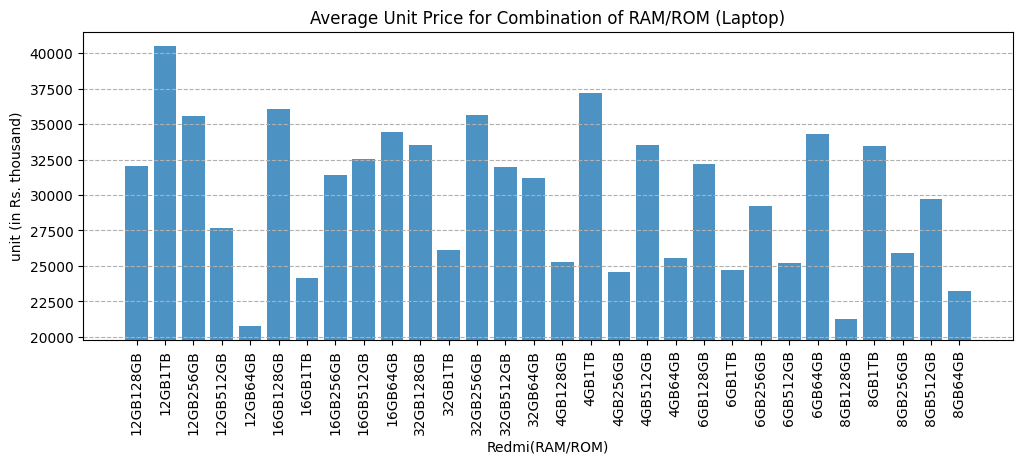

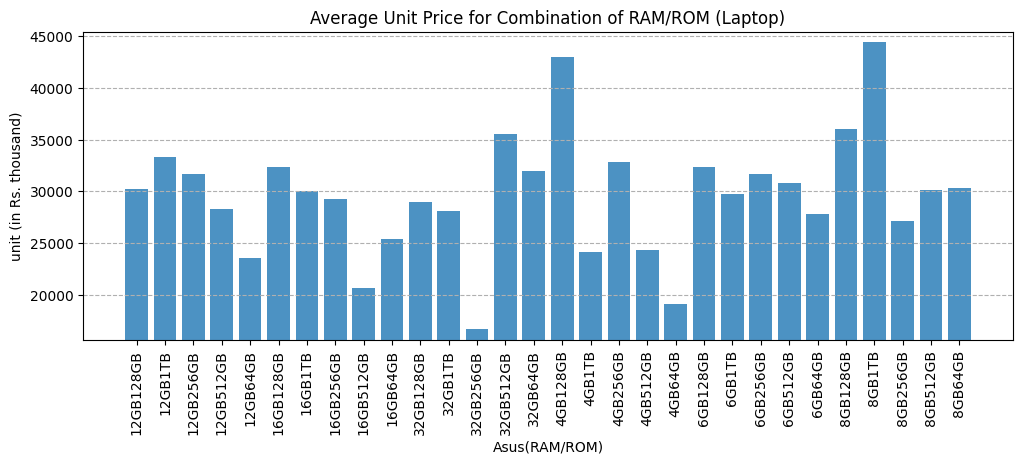

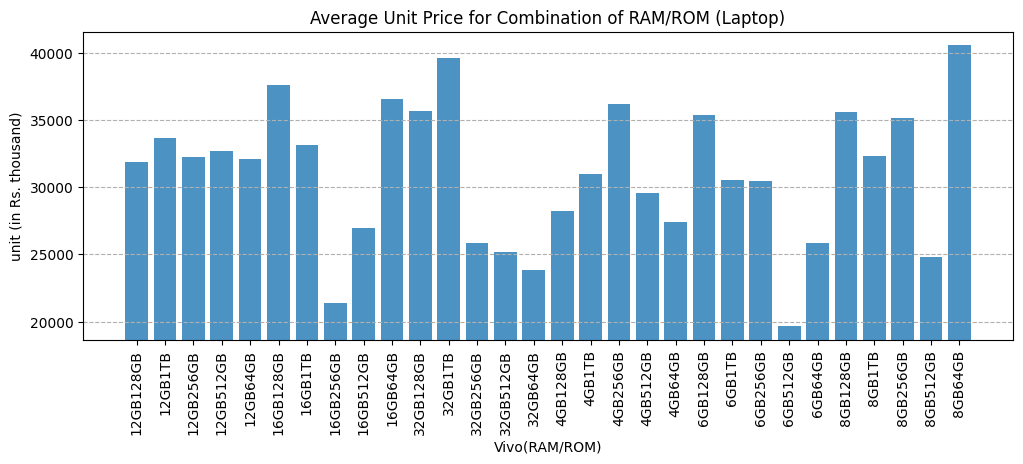

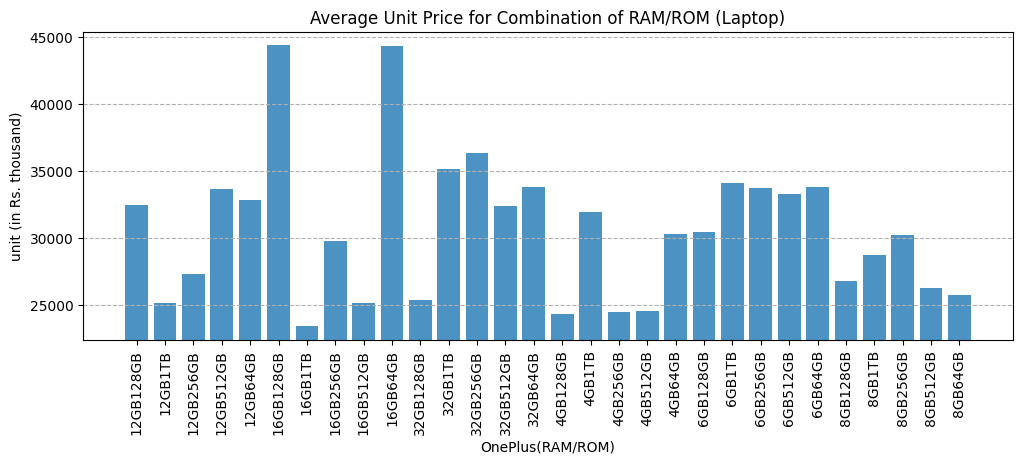

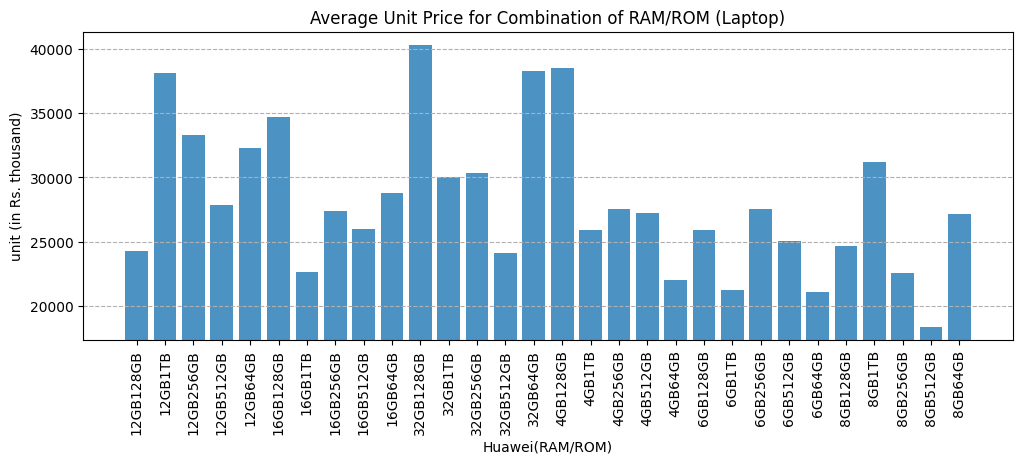

In [120]:
for i in df.Brand.unique():
    temp=Lap_df[Lap_df.Brand==i].groupby(["RAM/ROM"])["Unit Price"].mean()
    
    plt.figure(figsize=(12,4))
    plt.title("Average Unit Price for Combination of RAM/ROM (Laptop)")
    plt.bar(temp.index,temp.values,alpha=0.8)
    plt.ylim(min(temp.values)-1000,max(temp.values)+1000)
    plt.xticks(rotation=90)
    plt.xlabel(f"{i}(RAM/ROM)")
    plt.grid(axis="y",linestyle="--")
    plt.ylabel("unit (in Rs. thousand)")
    plt.show()

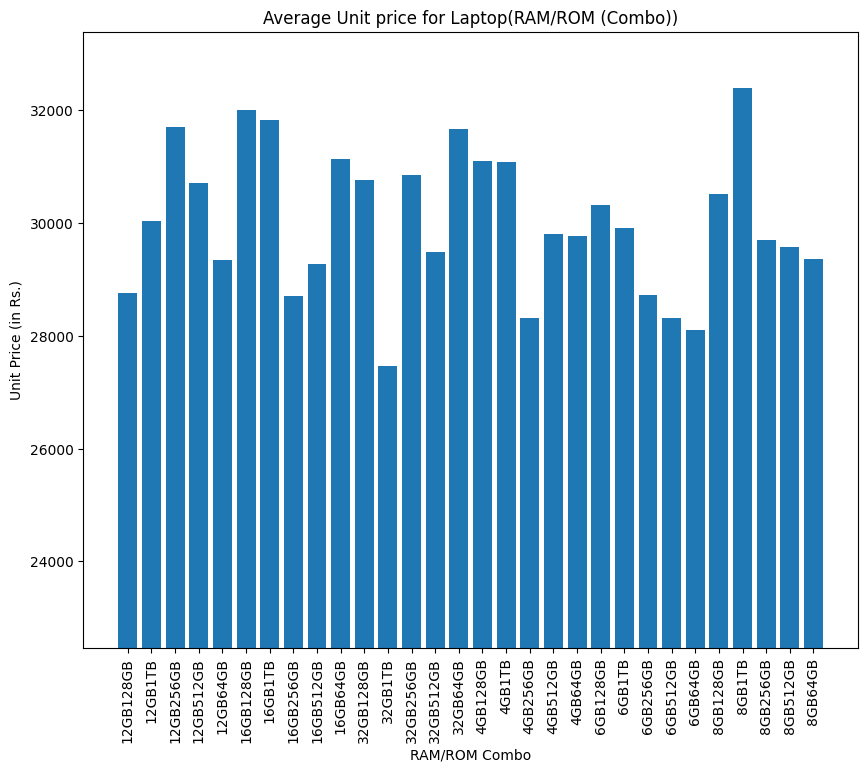

In [131]:
temp = Lap_df.groupby(["RAM/ROM"])["Unit Price"].mean()
plt.figure(figsize=(10,8))
plt.title("Average Unit price for Laptop(RAM/ROM (Combo))")
plt.xlabel("RAM/ROM Combo")
plt.ylabel("Unit Price (in Rs.)")
plt.bar(temp.index,temp.values)
plt.xticks(rotation=90)
plt.ylim(min(temp.values)-5000,max(temp.values)+1000)
plt.show()

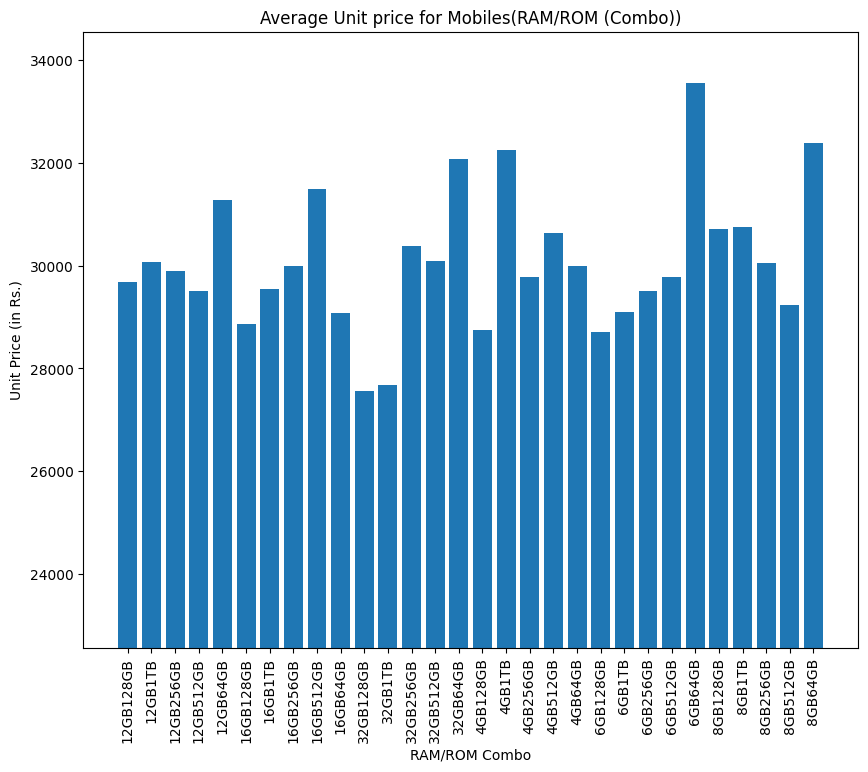

In [130]:
temp = Mob_df.groupby(["RAM/ROM"])["Unit Price"].mean()
plt.figure(figsize=(10,8))
plt.title("Average Unit price for Mobiles(RAM/ROM (Combo))")
plt.xlabel("RAM/ROM Combo")
plt.ylabel("Unit Price (in Rs.)")
plt.bar(temp.index,temp.values)
plt.xticks(rotation=90)
plt.ylim(min(temp.values)-5000,max(temp.values)+1000)
plt.show()